In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')

In [159]:
df = pd.read_csv('train.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [160]:
df.shape

(1460, 81)

### Dropping those columns that have more than 20% missing data

In [161]:
null_var = (df.isnull().sum()/df.shape[0])*100
drop_cols = null_var[null_var>20].keys()
df2 = df.drop(columns = drop_cols)
df2.shape

(1460, 76)

### Now we select the neumeric variables from our dataframe and form another dataframe

In [162]:
df2_num = df2.select_dtypes(include=['int64','float64'])
df2_num.shape

(1460, 38)

In [163]:
 df2_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

### Column names that have missing values

In [164]:
missing_num_cols = [var for var in df2_num.columns if df2_num[var].isnull().sum()>0]
missing_num_cols

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

### View the missing values in the columns

In [165]:
df2_num[missing_num_cols][df2_num[missing_num_cols].isnull().any(axis=1)]

,LotFrontage,MasVnrArea,GarageYrBlt
7,NaN,240.0,1973.0
12,NaN,0.0,1962.0
14,NaN,212.0,1960.0
16,NaN,180.0,1970.0
24,NaN,0.0,1968.0
31,NaN,0.0,1966.0
39,65.0,0.0,NaN
42,NaN,0.0,1983.0
43,NaN,0.0,1977.0
48,33.0,0.0,NaN


### Choosing a categorical variable for the first neumeric columns and checking whether that categorical variable has any null values

In [166]:
df2['LotConfig'].isnull().sum()

0

### Finding the number of unique classes in our chosen categorical variable

In [167]:
df2['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

### Finding the mean  of the neumerical variable which corresponds to each class in the chosen categorical variable

In [168]:
print(df2[df2.loc[:,'LotConfig']=='Inside']['LotFrontage'].mean(),
df2[df2.loc[:,'LotConfig']=='FR2']['LotFrontage'].mean(),
df2[df2.loc[:,'LotConfig']=='Corner']['LotFrontage'].mean(),
df2[df2.loc[:,'LotConfig']=='CulDSac']['LotFrontage'].mean(),
df2[df2.loc[:,'LotConfig']=='FR3']['LotFrontage'].mean())

67.7156862745098 63.515151515151516 84.03980099502488 59.91111111111111 70.75


### Using a loop for the same task

In [169]:
for label in df2['LotConfig'].unique():
    m=df2[df2.loc[:,'LotConfig']==label]['LotFrontage'].mean()
    print(m)

67.7156862745098
63.515151515151516
84.03980099502488
59.91111111111111
70.75


### Replacing the null values in the neumeric columns corresponding to each class with respective mean

In [170]:
m = df2[df2.loc[:,'LotConfig']=='Inside']['LotFrontage'].mean()
df2[df2.loc[:,'LotConfig']=='Inside']['LotFrontage'].replace(np.nan,m)

0        65.000000
2        68.000000
5        85.000000
6        75.000000
8        51.000000
10       70.000000
11       85.000000
12       67.715686
13       91.000000
17       72.000000
18       66.000000
19       70.000000
21       57.000000
22       75.000000
23       44.000000
24       67.715686
27       98.000000
29       60.000000
30       50.000000
33       70.000000
34       60.000000
35      108.000000
37       74.000000
38       68.000000
39       65.000000
40       84.000000
41      115.000000
44       70.000000
45       61.000000
47       84.000000
48       33.000000
49       66.000000
51       52.000000
53       68.000000
54       60.000000
55      100.000000
56       24.000000
59       60.000000
60       63.000000
61       60.000000
62       44.000000
63       50.000000
64       67.715686
65       76.000000
66       67.715686
67       72.000000
70       95.000000
73       85.000000
75       21.000000
76       67.715686
77       50.000000
78       72.000000
82       78.

### Using a loop for the same task and updating our dataframe

In [171]:
df2_copy1 = df2.copy()
for label in df2_copy1['LotConfig'].unique():
    m = df2_copy1[df2_copy1.loc[:,'LotConfig']==label]['LotFrontage'].mean()
    df2_copy1.update(df2_copy1[df2_copy1.loc[:,'LotConfig']==label]['LotFrontage'].replace(np.nan,m))

### Checking whether the null values got replaced in our neumeric column

In [172]:
df2_copy1['LotFrontage'].isnull().sum()

0

### Finding the non-null categorical columns corresponding to each neumeric column

In [173]:
missing_num_cols

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [174]:
# WE cannot choose MasVnrType as categorical variable for MasVnrArea
# Because MasVnrType has null values
df2_copy1['MasVnrType'].isnull().sum()

8

In [175]:
#So we choose another categorical column
df2_copy1['Exterior2nd'].isnull().sum()

0

In [176]:
#similarly for GarageYrBlt
df2_copy1['KitchenQual'].isnull().sum()

0

In [177]:
cat_cols = ['LotConfig','Exterior2nd','KitchenQual']

### Now we repeat the above tasks for all the neumeric columns

In [178]:
for cat_var,neum_var in zip(cat_cols,missing_num_cols):
    for label in df2_copy1[cat_var].unique():
        m = df2_copy1[df2_copy1.loc[:,cat_var]==label][neum_var].mean()
        df2_copy1.update(df2_copy1[df2_copy1.loc[:,cat_var]==label][neum_var].replace(np.nan,m))

### Checking are there any null values present in our neumeric variables

In [181]:
df2_copy1[missing_num_cols].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Plotting the distribution between the imputed neumerical columns and non-imputed neumeric columns

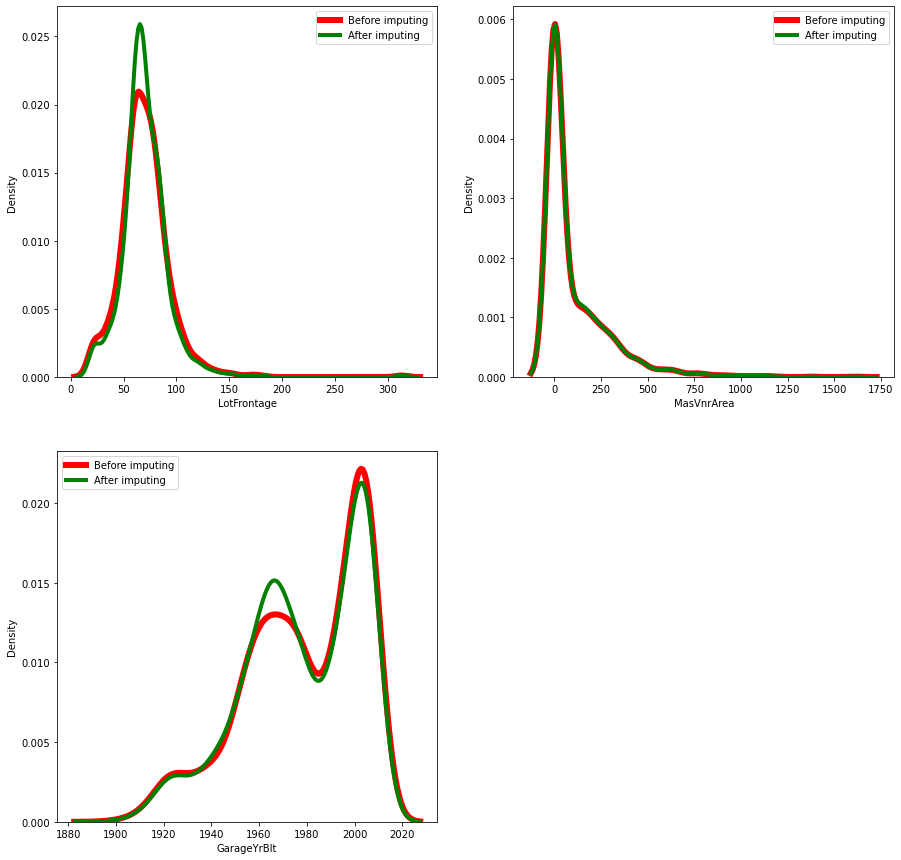

In [185]:
plt.figure(figsize=(15,15))
for i,var in enumerate(missing_num_cols):
    plt.subplot(2,2,i+1)
    sns.distplot(df2[var],hist=False,kde_kws={'linewidth':6,'color':'red'}, label='Before imputing')              
    sns.distplot(df2_copy1[var],hist=False,kde_kws={'linewidth':4,'color':'green'}, label='After imputing')     
    plt.legend()

### Now we use medain to fill in the null values

In [183]:
df2_copy2 = df2.copy()
for cat_var,neum_var in zip(cat_cols,missing_num_cols):
    for label in df2_copy1[cat_var].unique():
        m = df2_copy2[df2_copy2.loc[:,cat_var]==label][neum_var].median()
        df2_copy2.update(df2_copy2[df2_copy2.loc[:,cat_var]==label][neum_var].replace(np.nan,m))

In [184]:
df2_copy2[missing_num_cols].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

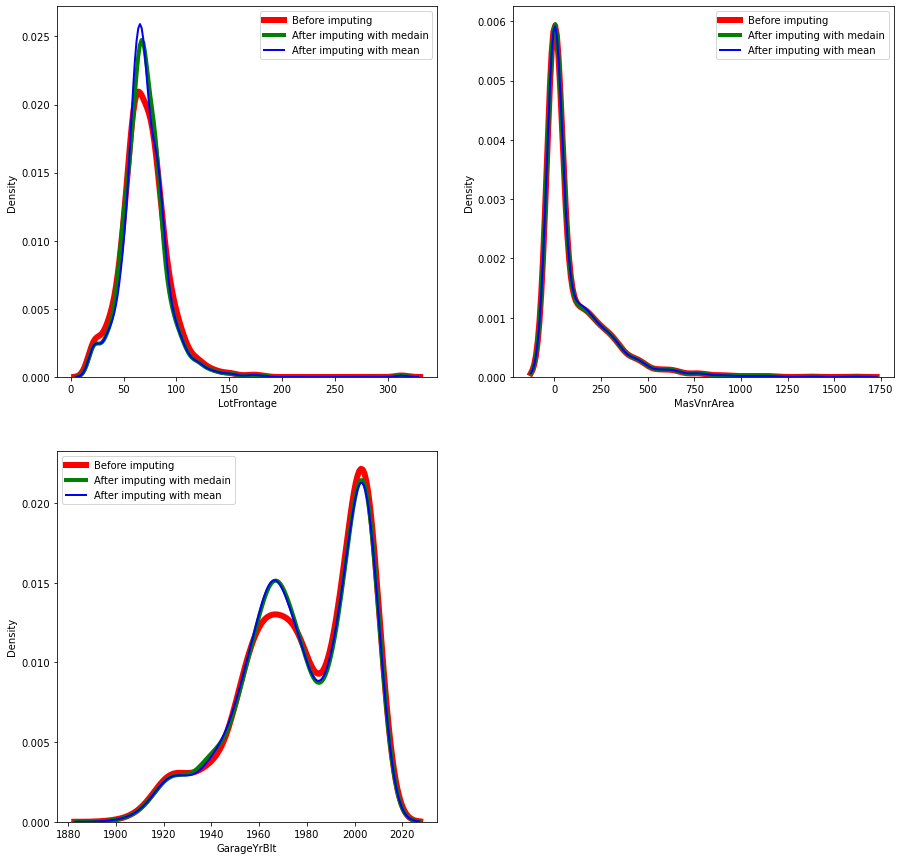

In [187]:
plt.figure(figsize=(15,15))
for i,var in enumerate(missing_num_cols):
    plt.subplot(2,2,i+1)
    sns.distplot(df2[var],hist=False,kde_kws={'linewidth':6,'color':'red'}, label='Before imputing')              
    sns.distplot(df2_copy2[var],hist=False,kde_kws={'linewidth':4,'color':'green'}, label='After imputing with medain')
    sns.distplot(df2_copy1[var],hist=False,kde_kws={'linewidth':2,'color':'blue'}, label='After imputing with mean')
    plt.legend()

### Plotting a box plot to anaylse the increase/decrease in outliers

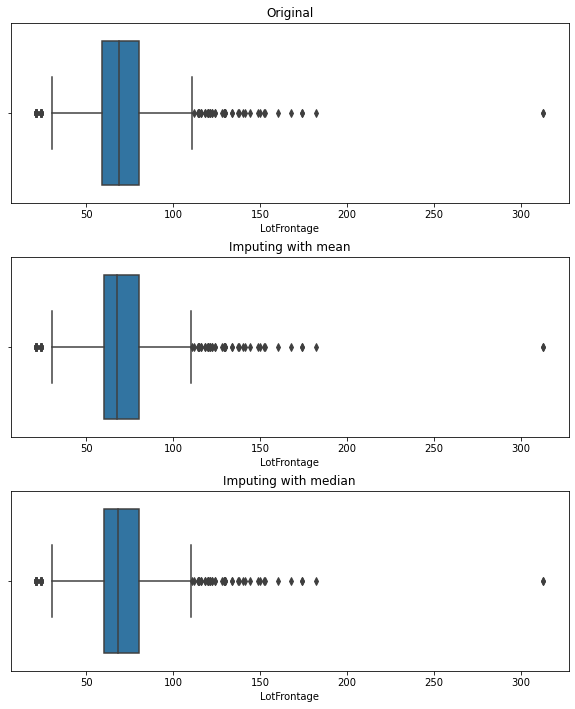

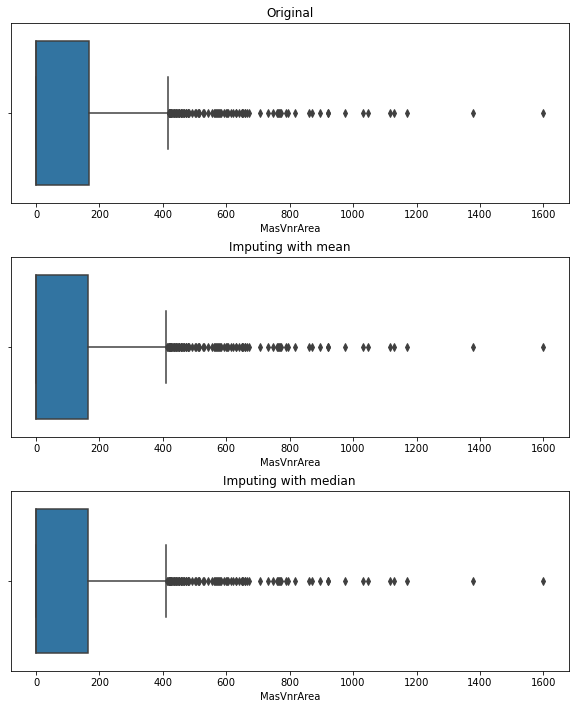

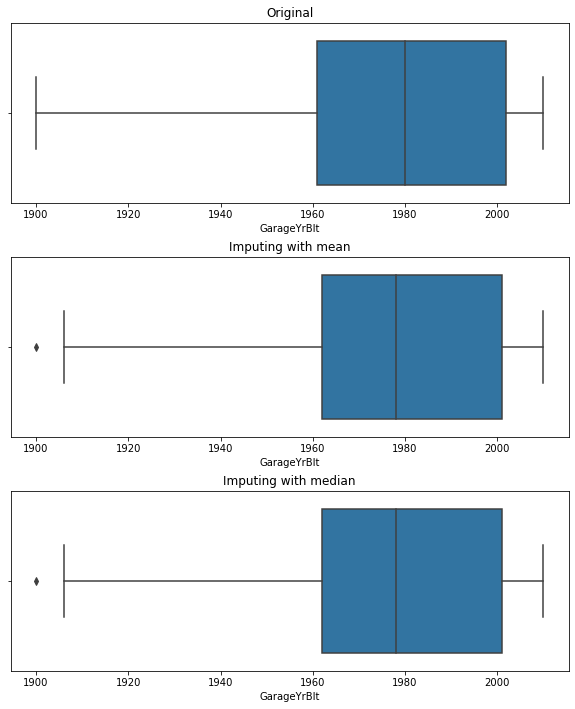

In [195]:
for i,var in enumerate(missing_num_cols):
    plt.figure(figsize=(10,10)) 
    plt.subplot(3,1,1)
    plt.title('Original')
    sns.boxplot(df2[var])
    plt.subplot(3,1,2)
    plt.subplots_adjust(top = 1.2, bottom=0.3, hspace=0.3, wspace=0.99)
    plt.title('Imputing with mean')
    sns.boxplot(df2_copy1[var])
    plt.subplot(3,1,3)
    plt.subplots_adjust(top = 1.2, bottom=0.3, hspace=0.3, wspace=0.99)
    plt.title('Imputing with median')
    sns.boxplot(df2_copy2[var])